## 1 Symbolic Computation using SymPy
Exercise 03_01

In [8]:
import sympy as sp

# Define the variable
x = sp.Symbol('x')

# Define the PDF f(x) with unknown c
c = sp.Symbol('c')
f_x = c * x**4

# Compute the integral of f(x) from -1 to 1 (should equal 1)
integral_c = sp.integrate(f_x, (x, -1, 1))

# Solve for c
c_value = sp.solve(integral_c - 1, c)[0]
print(f"Computed c: {c_value}")

# Define the CDF F(x) = ∫ f(t) dt from -1 to x
F_x = sp.integrate(c_value * x**4, x)  # Indefinite integral
F_x = F_x.subs(x, x) - F_x.subs(x, -1)  # Adjust for limits

print(f"CDF F(x): {F_x}")

Computed c: 5/2
CDF F(x): x**5/2 + 1/2


### Visualizind the Distribution

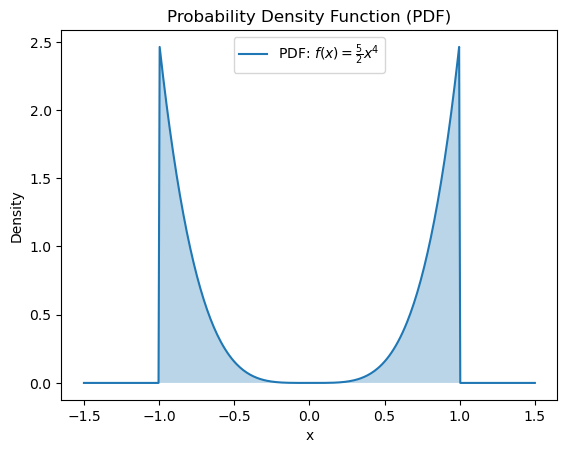

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range
x_vals = np.linspace(-1.5, 1.5, 400)
y_vals = [5/2 * x**4 if -1 <= x <= 1 else 0 for x in x_vals]

# Plot PDF
plt.plot(x_vals, y_vals, label="PDF: $f(x) = \\frac{5}{2} x^4$")
plt.fill_between(x_vals, y_vals, alpha=0.3)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.show()

### Compute Probabilities using SciPy
We use numerical integration since the probability is given by: 
P(a <= x <= b) = Integral of a,b f(X)dx

In [10]:
import scipy.integrate as spi

# Define the PDF function
def f(x):
    c = 5 / 2  # Computed constant
    return c * x**4 if -1 <= x <= 1 else 0  # Ensure it's 0 outside [-1,1]

# Compute P(-1/2 < X < 1/2)
p1, _ = spi.quad(f, -0.5, 0.5)

# Compute P(X > 0) = P(0 < X < 1)
p2, _ = spi.quad(f, 0, 1)

print(f"P(-1/2 < X < 1/2) = {p1:.6f}")
print(f"P(X > 0) = {p2:.6f}")


P(-1/2 < X < 1/2) = 0.031250
P(X > 0) = 0.500000


### Expected Value E[X]

In [11]:
# Define function for x * f(x)
def xf(x):
    return x * f(x)

# Compute E[X]
expected_value, _ = spi.quad(xf, -1, 1)

print(f"E[X] = {expected_value:.4f}")

E[X] = 0.0000


### Compute Variance Var(X)
The variance is given by: Var(X) = E[X^2] - (E[X])^2

In [12]:
# Define function for x^2 * f(x)
def x2f(x):
    return x**2 * f(x)

# Compute E[X^2]
expected_x2, _ = spi.quad(x2f, -1, 1)

# Compute Variance
variance = expected_x2 - expected_value**2

print(f"Var(X) = {variance:.4f}")

Var(X) = 0.7143


### Exercise 2 (Exam 2014.3)

A central database server receives, on the average, 25 requests per second from its clients. Assuming that requests received by a database follow a Poisson distribution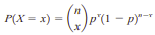

a)What is the probability that the server will receive no requests in a 10-millisecond interval?

b)What is the probability that the server will receive more than 2 requests in a 10-millisecond interval?

c)What is the probability that the server will receive between 2 and 4 (both included) requests in a 20-millisecond interval?

In [13]:
from scipy.stats import poisson
from scipy import *

#Point A 
lambda_10mili = 0.25
c = 1/2.71828**0.25
print(c) 

#B
p_more_than_2 = 1 -  poisson.cdf(2,0.25)
print(f"P(X > 2) in 10ms interval: {p_more_than_2:.4f}")

#C
lambe_20mili = 0.5
p_between_2_and_4 = poisson.cdf(4,lambe_20mili) - poisson.cdf(1,lambe_20mili)
print(f"P(1 < X < 5) in 20ms interval: {p_between_2_and_4:.4f}")

0.7788009140370318
P(X > 2) in 10ms interval: 0.0022
P(1 < X < 5) in 20ms interval: 0.0900


### Assignment 1 Lesson 4 - ex
f(x) = c(1-x**2) for -1 < x < 1

In [15]:
import sympy as sp
x = 2
#a  = sp.integrate(c*(1-x**2),(x,-1,1)) -1 